In [3]:
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
import scipy.signal
import scipy.io.wavfile as wv
import sounddevice as sd

In [2]:
fs, a = scipy.io.wavfile.read('stairway.wav')

 Ejercicio 1 - Generación de señales 
 ---------------

Generaremos muestras a partir de la siguiente señal continua

\begin{equation}
    \label{x}
    x(t) = \sin(2\pi f_0 t) + \cos(2\pi f_1 t)
\end{equation}



donde  $f_0 = 2$Hz y $f_1 = 3f_0$.

**1.1** Implemente una función  def $x(t)$   que devuelve los valores de $x(t)$ de una lista de valores en formato numpy.

In [4]:
def x(t):
    f0=2
    f1=3*f0
    a=np.sin(2*np.pi*f0*t)+np.cos(2*np.pi*f1*t)
    return a

**1.2** Genere una señal con un muestreo fino a una frecuencia de muestreo $f_{s0} = 1000$Hz sobre $N_0 = 1024$ muestras:

- Genere un arreglo $t_0$ de $N$ muestras temporales de valores $t = \frac{n}{f_{s0}}$.
        
- Evalue la función $x$ en el vector de tiempo $t_0$ y almacene los valores resultantes $x [n]$ en un vector $x_0$.
        
- Trace la señal con el eje de tiempo correcto en segundos. $(\texttt{pl.figure}, \texttt{pl.plot}, \texttt{pl.title})$

[0.000e+00 1.000e-03 2.000e-03 ... 1.021e+00 1.022e+00 1.023e+00]


Text(0.5, 0, 't[s]')

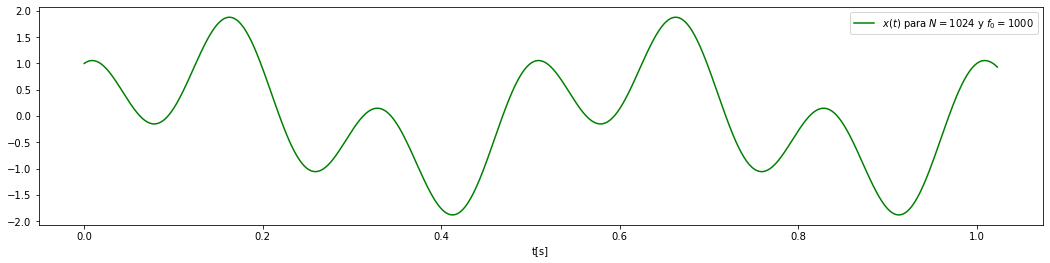

In [5]:
#Generamos el arreglo
N0=2**10
fs0=1000
t0=np.arange(0,N0/fs0,1/fs0)
print(t0)

#Evaluamos en la funcion x
x0=x(t0)

#Trazamos la señal
fig, ax = plt.subplots(1,1,figsize=(18,4))
o1=ax.plot(t0,x0,'g-',label='$x(t)$ para $N=1024$ y $f_0=1000$')
ax.legend()
ax.set_xlabel('t[s]')

**1.3** Genere una señal  $x_n$ con una frecuencia de muestreo $f_s = 20$ sobre $N = f_s$ muestras (muestreo de 1 segundo).

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]


Text(0.5, 0, 't[s]')

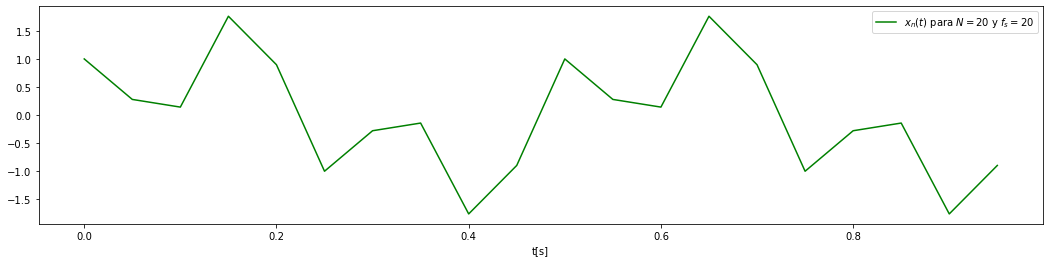

In [6]:
fs=20
N=fs
t1=np.arange(0,N/fs,1/fs)
xn=x(t1)
print(t1)

fig, ax = plt.subplots(1,1,figsize=(18,4))
o1=ax.plot(t1,xn,'g-',label='$x_n(t)$ para $N=20$ y $f_s=20$')
ax.legend()
ax.set_xlabel('t[s]')

**1.4** Grafique simultáneamente $x_0$ y $x_n$. Para $x_n$, use el estilo de trazado ``-o'' para ver la posición de las muestras.

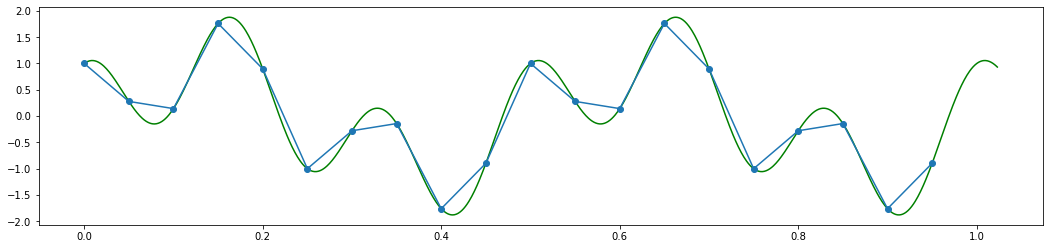

In [7]:
fig, ax = plt.subplots(1,1,figsize=(18,4))
o1=ax.plot(t0,x0,'g-')
o2=ax.plot(t1,xn,'o-')


# Ejercicio 2 - Reconstruccion de señales

1. ¿Cuál es la frecuencia de muestreo necesaria $fs$ para garantizar que la señal $x(t)$ pueda reconstruirse?

El teorema N-S nos dice que para garantizar que una señal $x(t)$ pueda reconstruirse la transformada de Fourier de la señal debe tener soporte compacto dentro del intervalo $[-\frac{\pi}{T},\frac{\pi}{T}]$. Entonces, para conocer la frecuencia de muestreo que garantiza que la señal pueda reconstruirse calculamos la transformada de $x(t)$:

$$x(t) =  \sin(4\pi t) + \cos(12\pi t) = \frac{e^{i4\pi t}-e^{-i4\pi t}}{2i}+\frac{e^{i12\pi t}+e^{-i12\pi t}}{2}$$
$\Rightarrow$ $$\hat x(w) = \frac{\pi}{i}(\delta(w-4\pi)-\delta(w+4\pi))+\pi(\delta(w-12\pi)+\delta(w+12\pi))$$
$\Rightarrow$ $$|\hat x(w)| = \pi(\delta(w-4\pi)+\delta(w+4\pi))+\pi(\delta(w-12\pi)+\delta(w+12\pi))$$

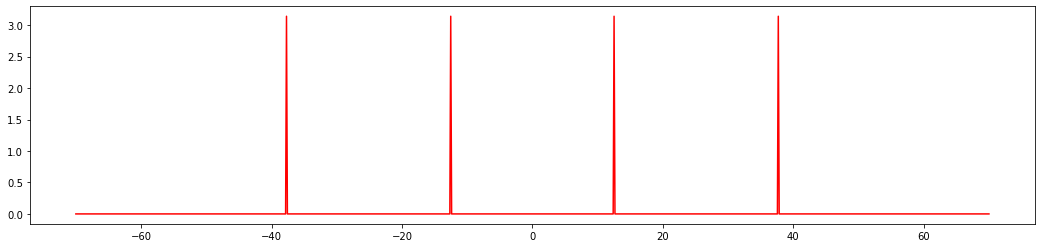

In [8]:
#Graficamos el modulo de la transformada de Fourier
N = 2**10 
L = 70
w = np.linspace(-L, L, N)
 

x = np.sin(4*np.pi*w)+np.cos(12*np.pi*w)
n_w0 = int((L+4*np.pi) * N/(2*L))
minus_n_w0 = int((L-4*np.pi) * N/(2*L))
n_w1 = int((L+12*np.pi) * N/(2*L))
minus_n_w1 = int((L-12*np.pi) * N/(2*L))
xhatmod = np.pi*(signal.unit_impulse(N, n_w0) + signal.unit_impulse(N, minus_n_w0))+np.pi*(signal.unit_impulse(N, n_w1) + signal.unit_impulse(N, minus_n_w1))

fig, ax = plt.subplots(1, 1,figsize=(18,4))
o1 = ax.plot(w, xhatmod, 'r-', label='modulo de $\hat x$')
    

De aqui notamos que la transformada de Fourier tiene soporte compacto en el intervalo $[-12\pi,12\pi]$, por lo tanto, para que se cumpla la hipotesis del teorema N-S sabiendo que $T=\frac{1}{f_s}$ debemos tener que
$$|\hat x(w)|\leq \frac{\pi}{T}= 12\pi \Rightarrow T=\frac{1}{12}$$
Luego, si el intervalo de muestr0

# 1.3 Generacion de señales de audio

1. Genere 1 segundo de una onda sinusoidal de magnitud 0.5 y de frecuencia f0 = 425Hz muestreada a
fs = 8000Hz. Gu´ardelo como un archivo wave y escuche el archivo o escuche directamente la se˜nal desde
python. Este es el tono de marcado de los tel´efonos europeos.

In [11]:
#Generamos y guardamos la señal
f0 = 425
fs = 8000 
t = np.arange(0,1,1/fs) 
amplitude = np.iinfo(np.int16).max

señal_1 = amplitude*np.sin(2*np.pi*f0*t) 

audio_1= wv.write("audio_1.wav",fs,señal_1.astype(np.int16))

# Escuchamos el archivo
sd.play(señal_1,fs)


2. Es posible generar notas musicales a partir de su n´umero MIDI m donde la frecuencia se expresa como
$$f_m = 440\cdot2^{\frac{m-69}{12}}$$

Vemos que hay 12 semitonos para pasar de una nota a su octava. 

La nota MIDI $m = 69$ es la LA 4 en notacíon y es el estándar de tono utilizado para afinar instrumentos
para conciertos.

La lista de notas y sus correspondientes nombres y frecuencias puede encontrarse en línea.

Implemente una funcíon def getNote (m, fs, l) que devuelve la nota m tocada durante l segundos a
la frecuencia fs.

In [14]:
def getNote(m,fs,l):
    ts=np.arange(0,l,1/fs)
    fm=440*2**((m-69)/12)
    amplitude = np.iinfo(np.int16).max
    señal = amplitude*np.sin(2*np.pi*fm*ts)
    sd.play(señal,fs)
    sd.wait()
    
    return señal
    

3. Guarde la nota m = 69 en un archivo llamado“A4.wav”. Escuche varias otras notas MIDI. ¿Qu´e pasa
para m = 117 (LA8) cuando se guarda a la frecuencia de muestreo fs = 8000Hz?

In [47]:
#Guardamos la nota m=69
A4=wv.write("A4.wav",8000,getNote(69,8000,1).astype(np.int16))

#Escuchamos otras notas MIDI
getNote(72,8000,0.8)
getNote(79,8000,0.8) 
getNote(77,8000,0.2)
getNote(76,8000,0.2)
getNote(74,8000,0.2)
getNote(84,8000,0.8) 
getNote(79,8000,0.8)
getNote(77,8000,0.2)
getNote(76,8000,0.2)
getNote(74,8000,0.2)
getNote(84,8000,0.8) 
getNote(79,8000,0.8)
getNote(77,8000,0.2)
getNote(76,8000,0.2)
getNote(77,8000,0.2)
getNote(74,8000,1.6)
getNote(117,8000,2) 

A117=wv.write("A117.wav",8000,getNote(117,8000,2).astype(np.int16))
#No noto nada extraño al guardar la nota m=117 :c

4. Codifique una secuencia de concatenacíon de notas $[70, 72, 68, 56, 63]$ (1 segundo cada una) y guarde la
secuencia como archivo “seq.wav”. ¿Le suena la secuencia?

In [15]:
#Codificamos la concatenacion
a=getNote(70,8000,1)
for i in [72,68,56,63]:
    b=np.append(a,getNote(i,8000,1))
    a=b

#Escuchamos la secuencia    
sd.play(a,fs)    
# La secuencia suena, pero la melodia no me suena :C

#Guardamos la secuencia
seq=wv.write("seq.wav",8000,a.astype(np.int16))    

5. La saturacíon puede ocurrir cuando los amplificadores alcanzan su máxima amplitud. El efecto de la
saturacíon puede ser reproducido usando un “clipeo” en un seno.

Compare la señal de la nota $m = 69$ a $440Hz$ para diferentes valores de recorte. Guarde la nota usando el
“clipeo” en un archivo ”A4clip.wav”. ¿Cual es el efecto de la saturacíon en el contenido frecuencial de la
señal?

In [38]:
#Comparamos con distintos valores
a=getNote(69,440,1)
sd.play(3*a,4400) 
 
#No entiendo a que se refiere con clipeo :C

6. Genere la señal
$$x(t) = sin(2\pi(\omega_0t+\frac{c}{2}t^2))$$

con $f_0 = 100Hz$ y $c = 500$ durante 1 segundo a una frecuencia de muestreo $fs = 8000Hz$. Esta señal es
llama “chirp” y corresponde a una modulacíon de frecuencia. Guarde la señal en el archivo “chirp.wav”.

In [46]:
#Generamos la señal
f_s=8000
w_0=100
c=500
t6=np.arange(0,1,1/f_s)
t6_2=np.transpose(t6)*t6 #vector t^2
amplitude = np.iinfo(np.int16).max

x=amplitude*np.sin(2*np.pi*(w_0*t6+t6_2*c/2))
sd.play(x,f_s)

#Guardamos la señal
chirp=wv.write("chrip.wav",f_s,x.astype(np.int16))